In [1]:
!wget -O fcc-forum-pageviews.csv "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv"


--2025-07-20 03:44:52--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0.001s  

2025-07-20 03:44:53 (14.8 MB/s) - ‘fcc-forum-pageviews.csv’ saved [22381/22381]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("fcc-forum-pageviews.csv",parse_dates=['date'],index_col='date')
low=df['value'].quantile(0.025)
high=df['value'].quantile(0.975)
df=df[(df['value']>=low)&(df['value']<=high)]
def draw_line_plot():
    fig,ax=plt.subplots(figsize=(15,5))
    ax.plot(df.index,df['value'],color='red',linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig
def draw_bar_plot():
    df_bar=df.copy()
    df_bar['year']=df_bar.index.year
    df_bar['month']=df_bar.index.strftime('%B')
    df_bar['month_num']=df_bar.index.month
    df_grouped=df_bar.groupby(['year','month','month_num'])['value'].mean().reset_index()
    df_pivot=df_grouped.pivot(index='year',columns='month_num',values='value')
    df_pivot.columns=[df_grouped[df_grouped['month_num']==i]['month'].values[0] for i in df_pivot.columns]
    fig=df_pivot.plot(kind='bar',figsize=(15, 8)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.tight_layout()
    fig.savefig('bar_plot.png')
    return fig
def draw_box_plot():
    df_box=df.copy()
    df_box.reset_index(inplace=True)
    df_box['year']=df_box['date'].dt.year
    df_box['month']=df_box['date'].dt.strftime('%b')
    df_box['month_num']=df_box['date'].dt.month
    df_box=df_box.sort_values(by='month_num')
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
    sns.boxplot(x='year',y='value',data=df_box,ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    fig.savefig('box_plot.png')
    return fig

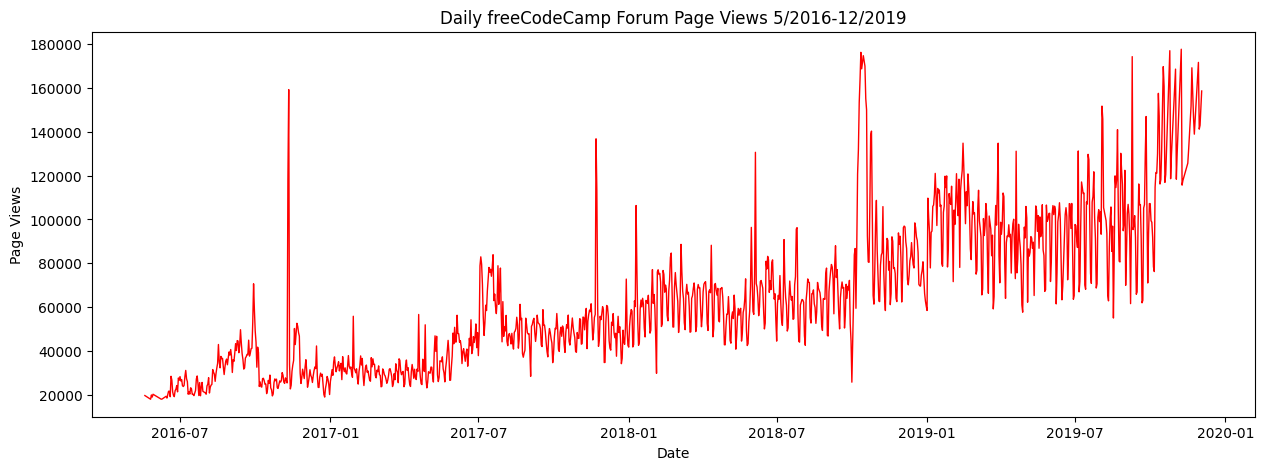

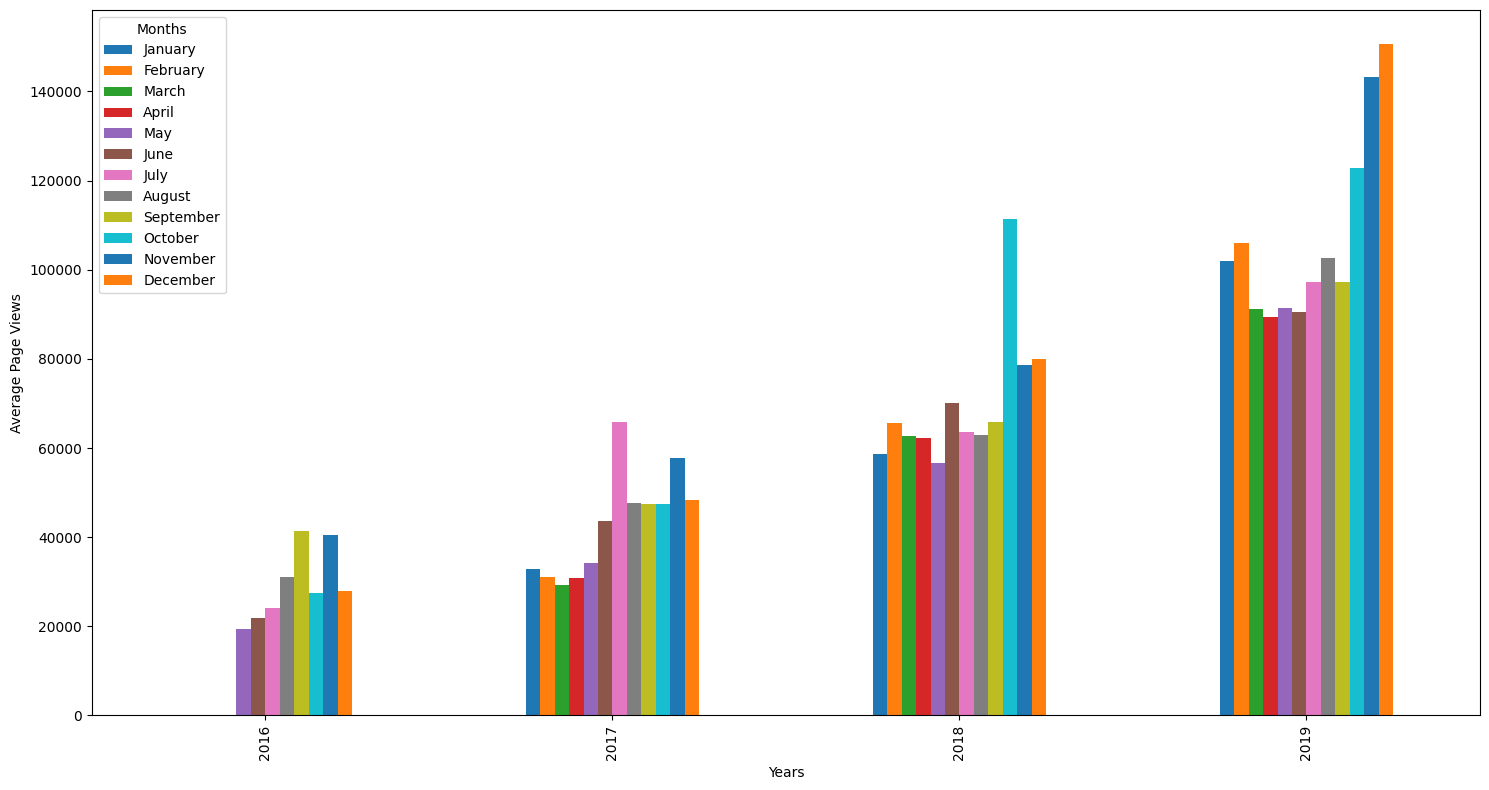

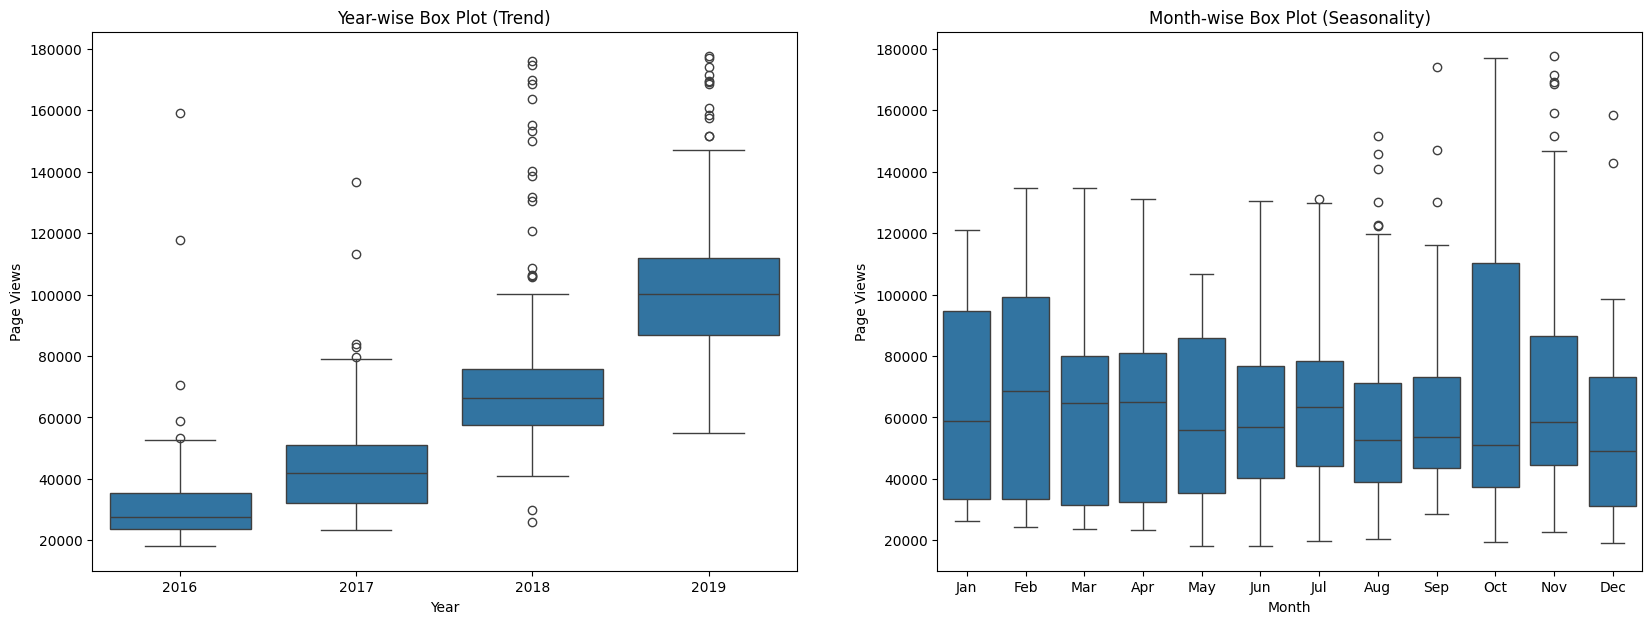

In [7]:
import matplotlib.pyplot as plt
fig=draw_line_plot()
fig=draw_bar_plot()
fig=draw_box_plot()
plt.show()